# How to (Finally) Install TensorFlow GPU on WSL2
## Works 100%

![](images/image.jpg)

After my article on installing TensorFlow GPU on Windows took off and became a featured snippet on Google, I decided to write the same tutorial for Windows Subsystem Linux (WSL2). By finishing the article, you will be able to train TensorFlow models with GPU support from your WSL2 installation.

### 1. Make sure you have TensorFlow GPU installed on Windows side

First, make sure that you follow the steps written in my first article:

https://towardsdatascience.com/how-to-finally-install-tensorflow-gpu-on-windows-10-63527910f255

Installing GPU support for TensorFlow on WSL2 is built on top of the NVIDIA CUDA drivers from the Windows side. So, it is important that you complete the steps from the first article. If you are able to run the following commands from the Windows Command Line and have the same output, you are good to go:

```bash
# Create an env for TensorFlow or use an existing one
$ conda create -n tf python=3.9 -y
$ conda activate tf
$ pip install tensorflow==2.10
$ python
>>> import tensorflow as tf
>>> len(tf.config.list_physical_devices('GPU'))
1
```

### 2. Check your WSL2 installation

Don't have a WSL2 installation yet? Don't worry, I got you covered in this regard as well. Go through my comprehensive article on installing it from here ADD THE ARTICLE LINK.

If you have WSL2 installed but haven't configured it for machine learning work, then continue reading.

### 3. Install Anaconda on WSL2

My preferred package manage is Anaconda. Let's install it on WSL2. First, go to https://www.anaconda.com/products/distribution and scroll down to the Anaconda Installers section:

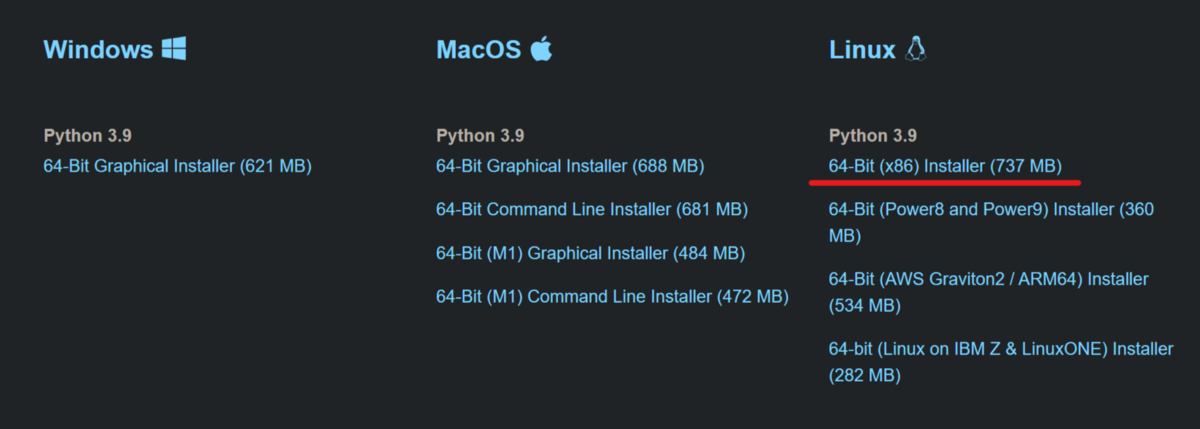

Copy the link of the highlighted installer. Note that we are choosing the Linux one as WSL2 doesn't work with `.exe` executables of Windows.

Then, go to your Linux terminal and download the file with `wget` in the root path (`~`):

```bash
$ wget https://repo.anaconda.com/archive/Anaconda3-2022.10-Linux-x86_64.sh
```

The command will download a Linux executable called `Anaconda3-2022.10-Linux-x86_64.sh`. To run it, you will use the `bash` command:

```
$ bash Anaconda3-2022.10-Linux-x86_64.sh
```

Follow the instructions (only press ENTER and 'yes'). Afterwards, you can remove the file:

```
$ rm -rf Anaconda3-2022.10-Linux-x86_64.sh
```

Make sure everything was successful by running `conda --version`.

```
$ conda --version
conda 22.9.0
```

### 4. Installing CUDA and cuDNN drivers for WSL2

Now, the most important step - installing compatible GPU drivers. From following [my first article](https://towardsdatascience.com/how-to-finally-install-tensorflow-gpu-on-windows-10-63527910f255), you know that the latest versions of TensorFlow requires 11.2 and 8.1 versions of CUDA and cuDNN. After those versions are installed from the Windows side, WSL2 expects the same versions as well.

To install them, execute the below steps attentively. 

First, remove the old NVIDIA GPG sign key and update/upgarde libraries:

```
$ sudo sudo apt-key del 7fa2af80
$ sudo apt update && sudo apt upgrade
```

Next, download and move the CUDA Ubuntu repository pin to the relevant destination and download new sign keys:

```
$ wget https://developer.download.nvidia.com/compute/cuda/repos/wsl-ubuntu/x86_64/cuda-wsl-ubuntu.pin
$ sudo mv cuda-wsl-ubuntu.pin /etc/apt/preferences.d/cuda-repository-pin-600

$ sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/3bf863cc.pub
$ sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64/7fa2af80.pub
```

Then, download the WSL2 CUDA Toolkit repository (it will take a while):

```
$ sudo add-apt-repository "deb https://developer.download.nvidia.com/compute/cuda/repos/wsl-ubuntu/x86_64/ /"
```

Update/upgrade the packages:

```
$ sudo apt update && sudo apt upgrade
```

Now, install the CUDA repository (it will take some time):

```
$ sudo apt-get -y install cuda
$ sudo apt update && sudo apt upgrade
```

Finally, we install cuDNN libraries with the following commands:

```
$ sudo apt-get install libcudnn8
$ sudo apt-get install libcudnn8-dev
$ sudo apt-get update && sudo apt-get upgrade
```

> Note that these steps work only for WSL Ubuntu 2004, x86_64 distro of WSL2. For other distros, replace the `$distro` and `$arch` in the above three links with yours. Example:  `https://developer.download.nvidia.com/compute/cuda/repos/$distro/$arch/3bf863cc.pub`

### 5. Install TensorFlow inside a conda environment

Finally, create a conda environment dedicated for TensorFlow. Here, I will create one named `tf`:

```
$ conda create -n tf python=3.9 -y
$ conda activate tf
```

Now, install TensorFlow with pip and check the installation:

```bash
$ pip install tensorflow==2.10
$ python
>>> import tensorflow as tf
>>> len(tf.config.list_physical_devices('GPU'))
1
```

You can also run the `nvidia-smi` command from the terminal:

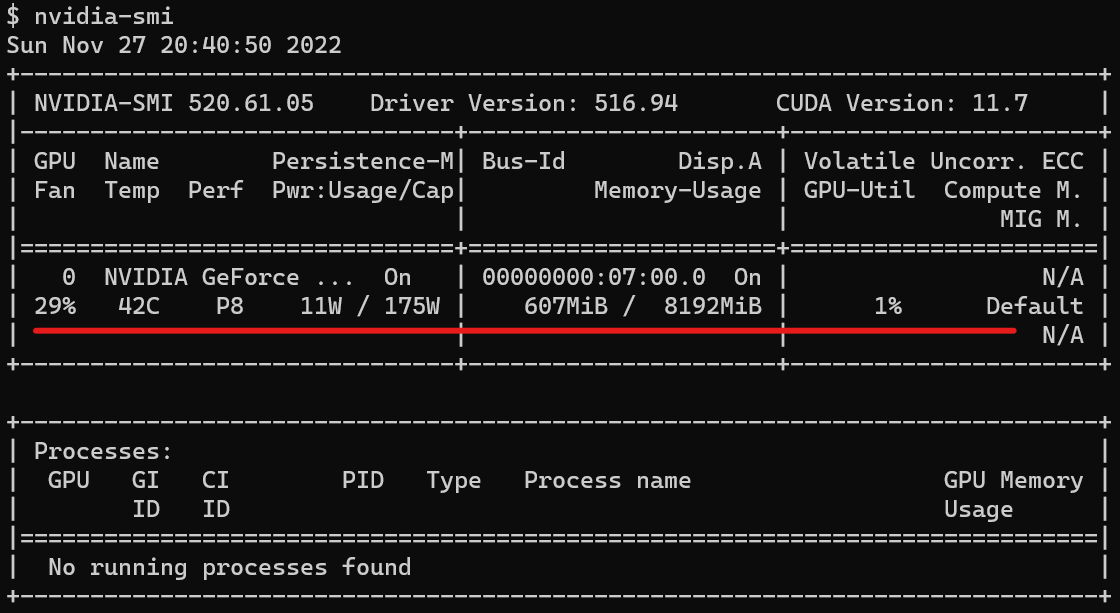

The center cell is telling that 607MB of GPU VRAM is in use out of 8GB. Great!

Now, let's train a sample model to see the GPU in action.

### 6. Check GPU in action

Inside a new Python script, paste the following code:

```python
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10),
    ]
)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

model.fit(x_train, y_train, epochs=5)
```

As the script runs, type the `nvidia-smi` command again. If the middle cell shows more GPU resources being used like below, congratulations! Your TensorFlow installation is now fully function with GPU support.

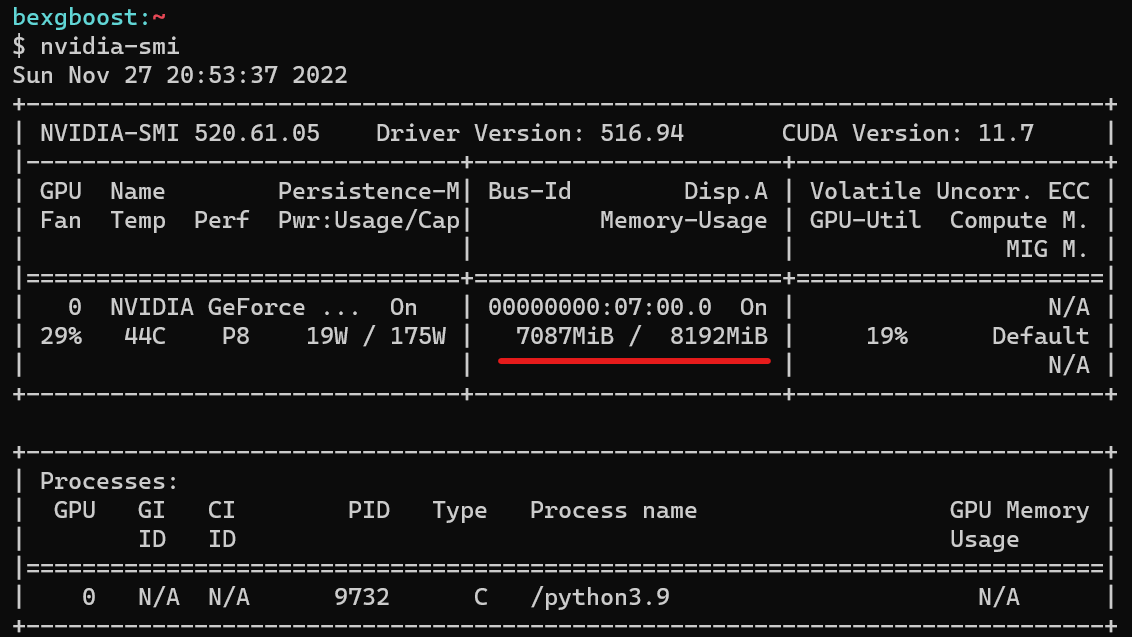

Note that when you are using GPU from WSL2, the GPU usage statistics won't show up in the Task Manager. That's why `nvidia-smi` command is recommended.

### Conclusion

This was it for this tutorial. Be sure to [follow me](https://ibexorigin.medium.com/) and [subscribe to my email list](https://ibexorigin.medium.com/subscribe) for my upcoming article on installing PyTorch with GPU support on both Windows and WSL2.

Thank you for reading! 

https://ibexorigin.medium.com/membership